<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/Regularization_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
X,y= make_moons(100, noise=0.25, random_state=42)

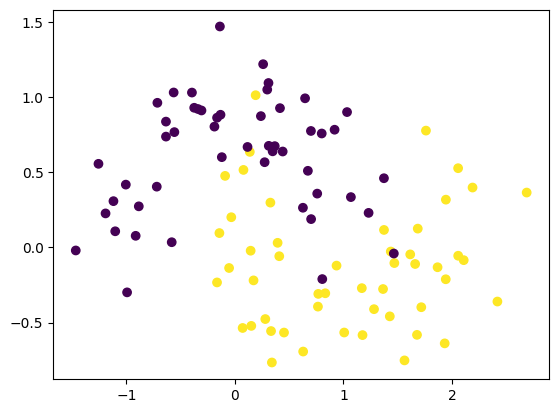

In [5]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [6]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

history1 = model.fit(X,y,epochs=2000, validation_split=0.2, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


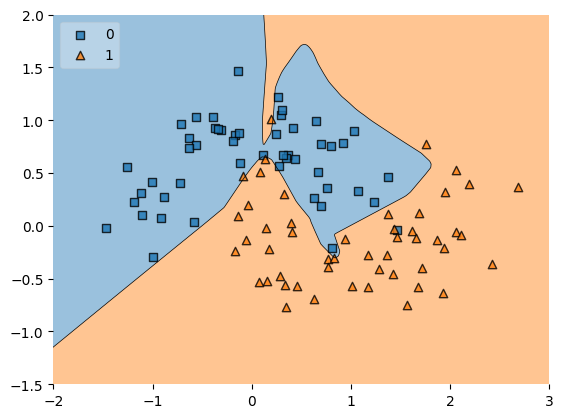

In [7]:
plot_decision_regions(X,y.astype('int'),clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

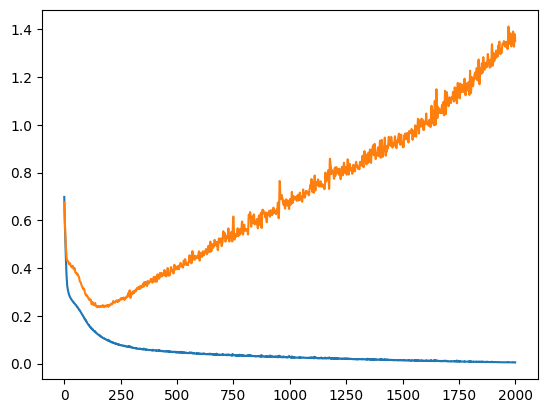

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

Using Regularization

In [16]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


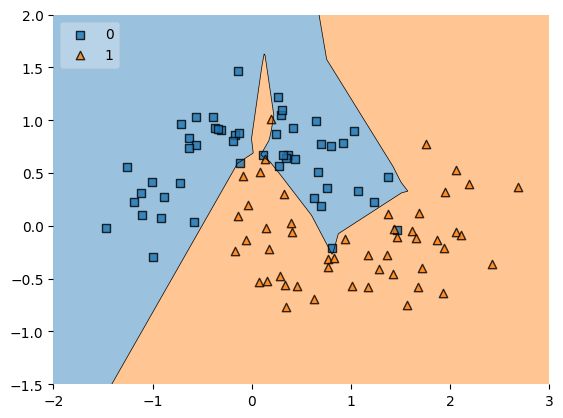

In [17]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

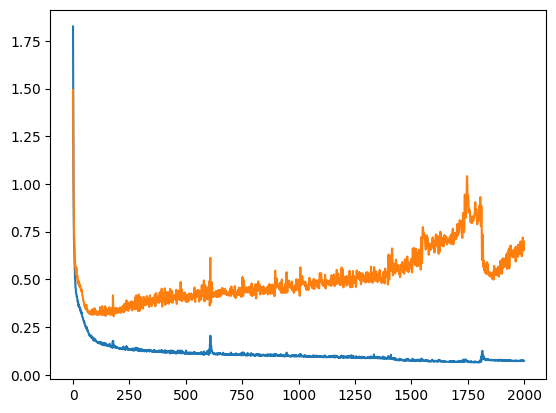

In [18]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [20]:
model1_weight_layer1 = model.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)


<Axes: >

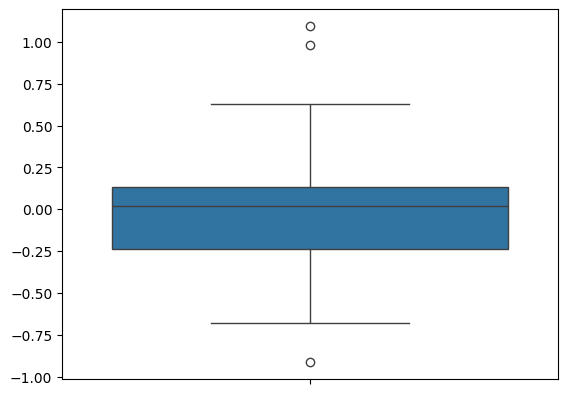

In [21]:
sns.boxplot(model1_weight_layer1)

<Axes: >

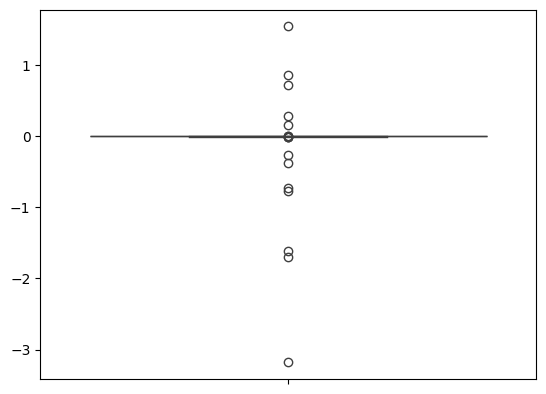

In [22]:
sns.boxplot(model2_weight_layer1)

In [23]:
model1_weight_layer1.min()

np.float32(-0.91404015)

In [25]:
model2_weight_layer1.min()

np.float32(-3.1804717)

/tmp/ipython-input-2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/tmp/ipython-input-2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

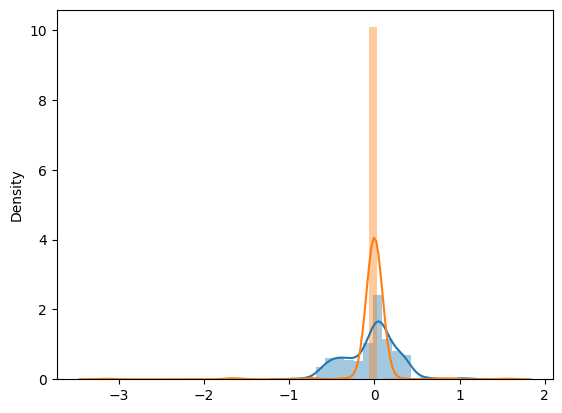

In [26]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [28]:
model.get_weights()[0].reshape(256)

array([-4.83583122e-01,  2.01896340e-01, -3.36248130e-01, -4.51853633e-01,
        3.85222197e-01,  2.41707474e-01, -3.55295420e-01, -1.72431454e-01,
        7.84541368e-02, -2.47344956e-01,  3.43812862e-04, -2.42363155e-01,
        2.99144655e-01, -6.23952806e-01,  8.38952735e-02, -1.65217489e-01,
        6.27908036e-02,  9.82199252e-01,  1.27151579e-01,  2.96795219e-01,
        2.97588855e-01, -5.32516658e-01, -5.98553961e-05, -5.88337600e-01,
       -3.66097577e-02, -6.16647363e-01,  2.92677611e-01,  2.99834341e-01,
       -4.73532617e-01, -5.69545627e-01, -5.85272968e-01, -2.33307883e-01,
       -4.21209633e-01, -5.02890348e-01, -3.55823576e-01,  7.52540901e-02,
       -4.63894486e-01,  3.60497892e-01,  2.85344094e-01,  1.45499229e-01,
       -2.58779656e-02,  2.44351804e-01, -2.49719098e-02,  3.06907091e-02,
        6.11488998e-01,  3.48794609e-01,  1.76422626e-01,  3.34522873e-02,
       -1.69195496e-02, -1.26678078e-02,  1.60220683e-01,  1.09532571e+00,
       -5.74760661e-02, -